# DataCamp - Data Scientist Career Track (Python)

##   Supervised Learning with scikit-learn                


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Supervised Learning with scikit-learn/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('ggplot')
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # SVC stands for Support Vector Classification, which is a type of SVM.

from sklearn.preprocessing import Imputer, scale, StandardScaler


##    CHAPTER 1  - Classification


#### Exercício 1 - Supervised learning

In [4]:
#vídeo

# Supervised learning # Unsupervised learning # Reinforcement learning


# Supervised learning

# Predictor variables/features and a target variable
# Aim: Predict the target variable, given the predictor variables
#   Classification: Target variable consists of categories (agora)
#   Regression: Target variable is continuous (depois)

# iris data
from sklearn.datasets import load_iris
iris = load_iris()

df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df_iris.rename(columns={'target': 'species'}, inplace=True) 
df_iris['species'] = df_iris['species'].map({0: "setosa", 1: 'versicolor', 2:'virginica'})  

df_iris.head(3)

# Naming conventions
#   Features = predictor variables = independent variables
#   Target variable = dependent variable = response variable

# Supervised learning:

# 1) Automate time_consuming or expensive manual tasks (example: doctor's diagnosis)
# 2) Make predictions (example: will a customer click an add or not)

# Need labeled data:
#   Historical data with labels
#   Experiments to get labeled data
#  Crowd-sourcing labeled data

# in Python: here we will use scikit-learn/sklearn. Integrate well with the SciPy stack
#            other libraries: TensorFlow, keras


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Exercício 2

In [5]:
# Which of these is a classification problem?
# Using labeled financial data to predict whether the value of a stock will go up or go down next week.

#### Exercício 3 - Exploratory Data Analysis

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


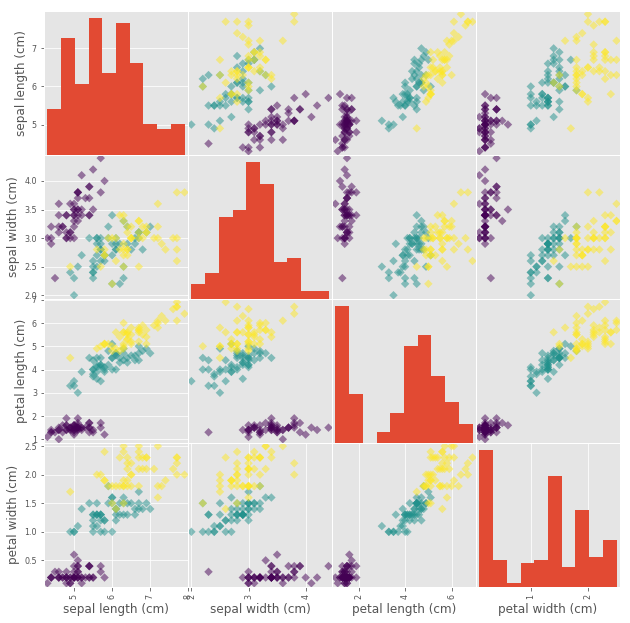

In [6]:
#vídeo

iris = datasets.load_iris()
type(iris)  #sklearn.utils.Bunch
print(iris.keys())

type(iris.data)    # numpy.ndarray
type(iris.target)  # numpy.ndarray

iris.data.shape # (150, 4)

X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

print(df.head())

# Visual EDA
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[8, 8], marker='D')  
# c = color ==> colored by species
# s = shape  (retirei, estava s=150)
# marker = 'D' de diamond. Ver lista completa em https://matplotlib.org/api/markers_api.html 

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


Exercício 4

In [7]:
# Numerical EDA

df = pd.read_csv(data_folder + "house-votes-84.csv", header=-1)
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

df.replace({'n': 0, 'y': 1, '?': np.nan}, inplace=True)
df.fillna(method='bfill', inplace=True)  # primeiro queremos este método
df.fillna(method='ffill', inplace=True)  # depois este para os casos em que os NaN estão na última linha

#################################################################################################################

# Select the one which is not true:

# The DataFrame has a total of 435 rows and 17 columns. (true)
# Except for 'party', all of the columns are of type int64. (true)
# The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes
#   made by Democrats. (true)
# There are 17 predictor variables, or features, in this DataFrame. (false)
# The target variable in this DataFrame is 'party'. (true)

print(df.shape)
print("================================")
print(df.info())
print("================================")

df.head(5)

# answer: There are 17 predictor variables, or features, in this DataFrame (false)

(435, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null float64
water                435 non-null float64
budget               435 non-null float64
physician            435 non-null float64
salvador             435 non-null float64
religious            435 non-null float64
satellite            435 non-null float64
aid                  435 non-null float64
missile              435 non-null float64
immigration          435 non-null float64
synfuels             435 non-null float64
education            435 non-null float64
superfund            435 non-null float64
crime                435 non-null float64
duty_free_exports    435 non-null float64
eaa_rsa              435 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB
None


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


Exercício 5

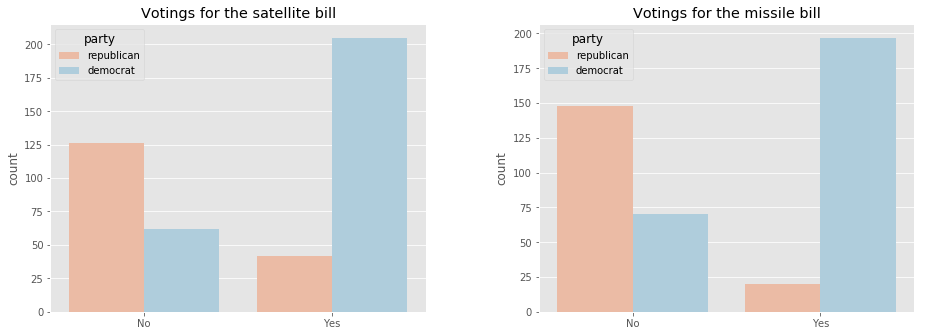

In [8]:
# Visual EDA

# Voting behavior of each party for different features/variables (bills in this case)

# satellite
plt.subplot(1, 2, 1)
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu') 
plt.xticks([0,1], ['No', 'Yes'])
plt.title("Votings for the satellite bill")
plt.xlabel('')

# missile
plt.subplot(1, 2, 2)
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')  
plt.xticks([0,1], ['No', 'Yes'])
plt.title("Votings for the missile bill")
plt.xlabel('')

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.3, hspace=0)
plt.show()

# Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? 
# Resposta: Both 'satellite' and 'missile'.

#### Exercício 6 - The classification challenge

In [9]:
#vídeo

# labeled data ==> training data

# classifier algorithm: k-Nearest Neighbors

#   Predict the label of a data point by
#     looking at the 'k' closest labeled data points
#     taking a majority vote (por isso k normalmente é ímpar)

# k-NN creates decision boudaries

# All machine learning models are implemented in Python classes:
#   they implement the algorithms for learning and predicting
#   store the information learned from the data

# Training a model on the data == 'fitting' a model to the data ==> .fit() method
# To predict the labels of new data: .predict() method

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

# fit
print(knn.fit(iris['data'], iris['target']))  # features, target values

# exige data as pd.DataFrame ou np.array
# exige que as features/variáveis sejam valores contínuos (e não categorias como male/female)
# exige que não haja NaN

iris['data'].shape


# Predicting on unabeled data

X_new = [[6.5, 6.5, 5, 2]]  #  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)

prediction = knn.predict(X_new)
# X_new.shape

species = {i: j for i, j in enumerate(iris['target_names'])}
print(species)

prediction = species[prediction[0]] 

print('Prediction: {}'.format(prediction))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
Prediction: virginica


Exercício 7

In [10]:
# k-Nearest Neighbors: Fit a k-NN classifier to the voting dataset

# The features need to be in an array where each column is a feature and each row a different observation or data point
# The target needs to be a single column with the same number of observations as the feature data.
# we named the feature array 'X' and response variable 'y': This is in accordance with the common scikit-learn practice


# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

Exercício 8

In [11]:
# k-Nearest Neighbors: Predict

# foram usados todos os dados para fazer o fit... q n é recomendável

# Random unlabeled (new) data    
X_new = [np.random.random(size=16)]  
# X_new = [ 0.22486803,  0.75679565,  0.14753411,  0.07203205,  0.16482788,
#          0.08747657,  0.26653083,  0.82852049,  0.85513979,  0.11807753,
#          0.0090666 ,  0.09171749,  0.64186714,  0.11221456,  0.25834457,
#          0.41254893]

# devia ser com 0's e 1's mas para o efeito vamos considerar assim
########################################################################################

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn, and fit it to the data
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

#########################################################

# Predict the labels for the training data X
y_pred = knn.predict(X)
# print(y_pred)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print(new_prediction)
print("Prediction: {}".format(new_prediction))

# How sure can you be of its predictions?

['democrat']
Prediction: ['democrat']


#### Exercício 9 - Measuring model performance

X_test:
 [[1. 1. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]] 

Test set predictions:
 ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat'] ......

 0.9465648854961832


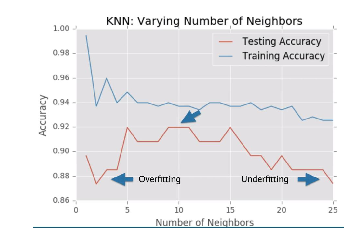

In [12]:
#vídeo   

# in classification, accuracy is a common metric (fraction of correct predictions)

# Split data into training and test set
#   Fit/train the classifier on the training set
#   Make predictions on test set
#   Compare predictions with the known labels

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# test_size ---> what proportion of the data is used for the test set (por default é 0.25)
# random_state ---> sets a seed for the random number generator that splits the data into train and test.
#                   seting the seed with the same argument later allow to reproduce the exact split and downstream results.
# stratify ---> so that the split reflects the labels on the data

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("X_test:\n", X_test, "\n")
print("Test set predictions:\n {}".format(y_pred[:20]), "......")

print("\n", knn.score(X_test, y_test))   #(correct predictions / n)

# .score(), for knn classifiers, computes the mean accuracy of predictions
errors = 0
for a, i in enumerate(y_pred):
    if y_test[a] != i:
        errors += 1

assert (1 - errors / len(y_test)) == knn.score(X_test, y_test)


# Model complexity and over/underfitting:

#  Smaller k: more complex model = can lead to overfitting
#  Larger k: smoother decision boundary = less complex model


# Model complexity curve ---> imagem
imagem = plt.imread(data_folder + "model_complexity_curve.jpg")
plt.axis('off')
# plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

Exercício 10

In [13]:
# A reduced version of the MNIST dataset (http://yann.lecun.com/exdb/mnist/) is one of scikit-learn's included datasets

# Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit.
# Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black.
# Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects.
# Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys 
#  that you have seen with the Iris data.
# this 'images' key is useful for visualizing the images.
# the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

# For more on the MNIST data, check out Part 1 of DataCamp's Importing Data in Python course. (chapt 1, ex 9)
# There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine
# learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


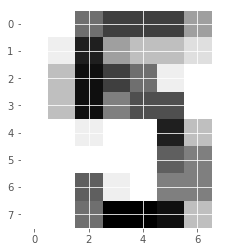

In [14]:
# The digits recognition dataset (multi-class classification, in this case 0-9 classes)

# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
# print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Exercício 11

In [15]:
# Train/Test Split + Fit/Predict/Accuracy

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels 
of the images in the test set with 98% accuracy, in less than a second

Exercício 12

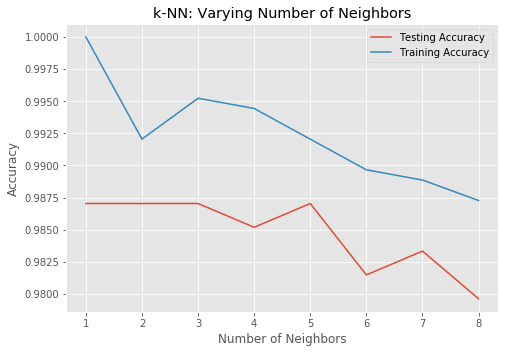

In [16]:
# Overfitting and underfitting

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data

# CHAPTER 2 - Regression

#### Exercício 1 - Introduction to regression

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


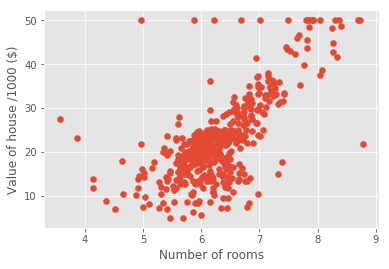

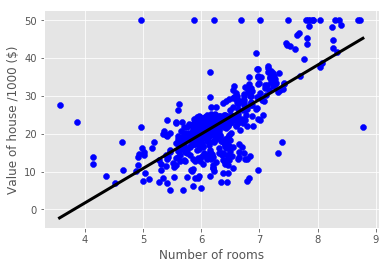

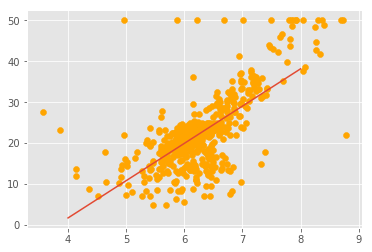

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
#vídeo

boston = pd.read_csv(data_folder + "boston.csv")

boston.head()

# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Predicting house value from a single feature (rooms)
X_rooms = X[:, 5]


print(type(X_rooms))  # <class 'numpy.ndarray'>
print(type(y))        # <class 'numpy.ndarray'>

# reshape
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)
# The 1 in the second place of reshape tells that there is a single column only and -1 is to detect the number of 
# rows automatically for this single column.


plt.scatter(X_rooms, y)
plt.ylabel("Value of house /1000 ($)")
plt.xlabel("Number of rooms")
plt.show()


# Fitting a (linear) regression model

from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.ylabel("Value of house /1000 ($)")
plt.xlabel("Number of rooms")
plt.show()


# another way 
a, b = np.polyfit(X[:, 5], boston['MEDV'].values, 1)

x_1 = np.array([4, 8])
y_1 = a * x_1 + b

plt.scatter(X_rooms, y, color='orange')
plt.plot(x_1, y_1)
plt.show()

boston.head()


Exercício 2

In [18]:
# Which of the following is a regression problem?

# A bike share company using time and weather data to predict the number of bikes (quantit.) being rented at any given hour.

Exercício 3

In [19]:
# Importing data for supervised learning

# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df  (drop 'Region')
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)   #(only quantitative data)


# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

#  since you are going to use only **one feature** to begin with, you need to do some reshaping using NumPy's .reshape() 
# method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when 
# working with scikit-learn so it is useful to practice.

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Exercício 4

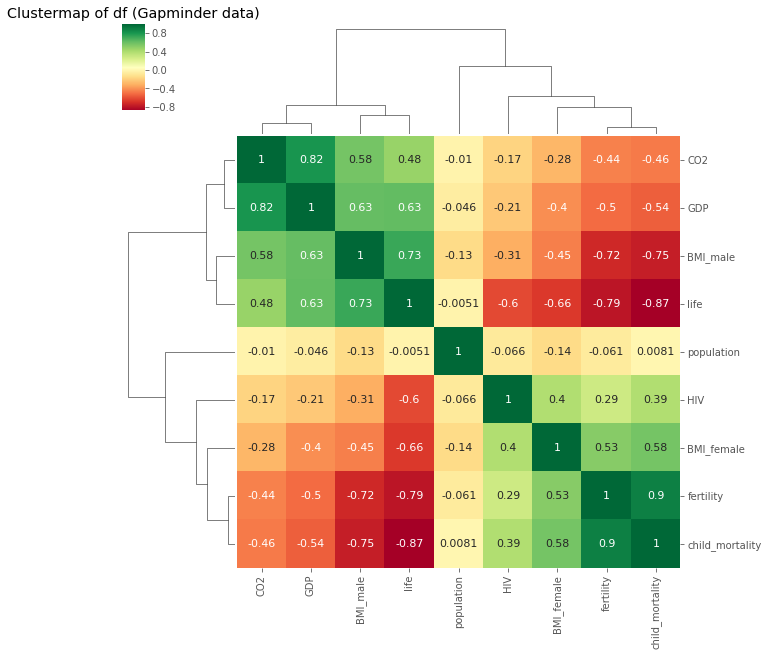

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB

df['life'] mean: 69.60287769784175


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [20]:
# Exploring the Gapminder data   - usei o clustermap em vez do heatmap

# clustermap
sns.clustermap(df.corr(method='pearson'), cmap='RdYlGn', annot=True, annot_kws={"size": 11})
plt.title('Clustermap of df (Gapminder data)')
plt.show()

df.info()

print("\ndf['life'] mean:", df.life.mean())

df.head()

# sns.heatmap(df.corr(method='pearson'), cmap='RdYlGn', annot=True)
# plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1.2, wspace=0, hspace=0)

In [21]:
# select the one that is not true:

# (true) The DataFrame has 139 samples (or rows) and 9 columns.
# (true) life and fertility are negatively correlated.
# (true) The mean of life is 69.602878.
# (false) ---> fertility is of type int64.
# (true) GDP and life are positively correlated.

#### Exercício 5 - The basics of linear regression

In [22]:
#vídeo

# Regression mechanics
# the loss function - OLS (ordinary least squares) 
# minimize the sum of squares of residuals / minimizing the mean squared error
# linear regression in higher dimensions

# Linear regression on all features (of the boston data)

boston = pd.read_csv(data_folder + "boston.csv")

# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LinearRegression
reg_all = linear_model.LinearRegression()

# Fit and predict
y_pred = reg_all.fit(X_train, y_train).predict(X_test)


# For classification, the performance measure was .score(X_test, y_test) calculating the fraction of hits
# For linear regression, the default measure is R^2 (variance explained by the features variance)

print("R^2:", reg_all.score(X_test, y_test))  #---> coeficiente de determinação

# boston.head()

# don't perform it out of the box like this... you need Regularization

R^2: 0.7112260057484929


Exercício 6

R^2: 0.6192442167740035


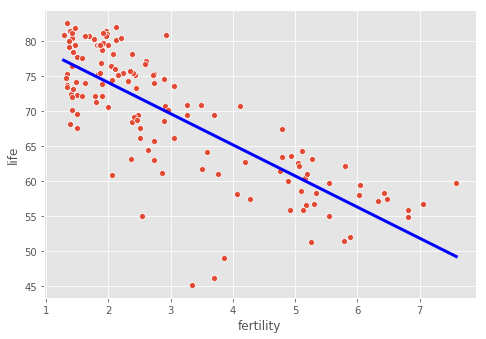

In [23]:
# Fit & predict for regression (one feature)

# gapminder data 
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)


# Create arrays for features and target variable, and reshape
y = df['life'].values
X_fertility = df['fertility'].values
# reshape
y = y.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)


# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R^2:", reg.score(X_fertility, y))

# Plot regression line
sns.scatterplot('fertility', 'life', data=df)
plt.plot(prediction_space, y_pred, color='blue', linewidth=3)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#  the performance is quite decent for this basic regression model with only one feature

Exercício 7

In [24]:
# Train/test split for regression (all features)

# gapminder data
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)

# Create arrays for features and target variable, and reshape
y = df['life'].values
X = df.drop('life', axis=1).values

##########################################################################################

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)                            # .coef_    (para ver os coeficientes)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 (.score()) and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Mean Squared Error 
MSE = np.sum((y_pred - y_test)**2) / len(y_pred)

assert np.sqrt(MSE) == rmse


# Using all features has improved the model score. This makes sense, as the model has more information to learn from. 
# However, there is one potential pitfall to this process. 

variaveis = list(df.columns)
variaveis.pop(variaveis.index('life'))
print("\nvariáveis explicativas:", variaveis)
print("variáveis explicada: 'life'")
print("\n However, there is one potential pitfall to this process --> validation")

R^2: 0.8380468731430059
Root Mean Squared Error: 3.247601080037022

variáveis explicativas: ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']
variáveis explicada: 'life'

 However, there is one potential pitfall to this process --> validation


#### Exercício 8 - Cross-validation

In [25]:
#vídeo

# Cross-validation motivation:
#  Model performance is dependent on way the data is split
#  Not representative of the model's ability to generalize
# Solution: cross-validation


# Separate the group into 5 groups/folds    /   (5-fold cross-validation)  /  (5-fold CV)

# Split 1: Fold1 (test data); Fold2 + Fold3 + Fold4 + Fold5 (training data)  ---> predict ---> score
# Split 2: Fold2 (test data); Fold1 + Fold3 + Fold4 + Fold5 (training data)  ---> predict ---> score
# Split 3: Fold3 (test data); Fold1 + Fold2 + Fold4 + Fold5 (training data)  ---> predict ---> score
# Split 4: Fold4 (test data); Fold1 + Fold2 + Fold3 + Fold5 (training data)  ---> predict ---> score
# Split 5: Fold5 (test data); Fold1 + Fold2 + Fold3 + Fold4 (training data)  ---> predict ---> score

# we then get 5 scores (R^2) :
#   from which we can compute statistics of interest, like: 
#      mean, median, 95% confidence intervals

# We can use 10-fold CV, or k-fold CV
# more folds are more computationally expensive


# Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=5)   # cross-validation scores
print("cv_results:", cv_results)  # array of R^2, since it is the default score for linear regression

print("cv_results mean:", np.mean(cv_results))


# Cross-validation is a vital step in evaluating a model. 
# It maximizes the amount of data that is used to train the model, as during the course of training, the model is not
# only trained, but also tested on all of the available data.

cv_results: [0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
cv_results mean: 0.8599627722793267


Exercício 9

In [26]:
# 5-fold cross-validation

# By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression

# gapminder data
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)

# Create arrays for features and target variable, and reshape
y = df['life'].values
X = df.drop('life', axis=1).values

##########################################################################################

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793267


Exercício 10

In [27]:
# K-Fold CV time comparison

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print("Average 3-Fold CV Score: {}".format(np.mean(cvscores_3)))
%timeit cvscores_3

print("======================================================================================")

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print("Average 10-Fold CV Score: {}".format(np.mean(cvscores_10)))
%timeit cvscores_10


Average 3-Fold CV Score: 0.8718712782621969
41.8 ns ± 6.02 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Average 10-Fold CV Score: 0.8436128620131095
33.3 ns ± 2.45 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#### Exercício 11 - Regularized regression

Gapminder data:
Ridge score: 0.844246995997575
Lasso score: 0.8721296169613542
LinearRegression score: 0.8380468731430059
Boston data:


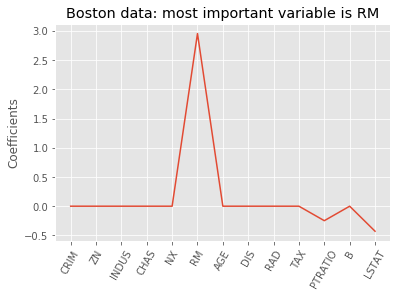

it's important to show the coefficients and highlight its importance


In [28]:
#vídeo

# Why regularize?
#  Recall: Linear regressions minimizes a loss function
#  It chooses a coefficient for each feature variable
#  Large coefficients can lead to overfitting
# Penalizing large coefficients: Regularization

##################################################################################################################

# 1) Ridge regression
#   Loss function = OLS loss function + 'alpha'*np.sum(ai^2)
#    models are penalized for coefficients with a large magnitude (large positive and large negative)
#       'alpha' == a parameter we need to choose
#       picking 'alpha' is similar to picking k in k-NN --> (Hyperparameter tuning - chapter 3)
#       'alpha' controls model complexity
#            'alpha' = 0 ---> OLS, can be overfitting
#            'alpha' very high ---> underfitting

# o 'alpha' é o q costuma aparecer como 'lambda' na literatura
# ridge regression will include all p predictors in the final model.


# 2) LASSO regression
#   Loss function = OLS loss function + 'alpha'*np.sum(|ai|)

# Can be used to select important features of a dataset (shrinks the coefficients to 0, while Ridge maintains all)


# (ver literatura)
############################################################################
from sklearn.linear_model import Ridge, Lasso   #em vez de LinearRegression
from sklearn.model_selection import train_test_split
############################################################################


# 1) Ridge regression in scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    # gapminder data

ridge = Ridge(alpha=0.1, normalize=True)
# 'alpha' aqui vamos pôr 0.1 só pq sim
# normalize para todas as variáveis terem a mesma escala 

ridge.fit(X_train, y_train)

ridge.predict(X_test)

print("Gapminder data:")
print("Ridge score:", ridge.score(X_test, y_test))             # reg_all.score(X_test, y_test) = 0.8380468731430059

##########################################################################################################

# 2) LASSO regression in scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    # gapminder data

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso.predict(X_test)

print("Lasso score:", lasso.score(X_test, y_test))             # reg_all.score(X_test, y_test) = 0.8380468731430059
print("LinearRegression score: 0.8380468731430059")
print("=======================================================================")
##########################################################################################################

print("Boston data:")

boston = pd.read_csv(data_folder + "boston.csv")
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

names = boston.drop('MEDV', axis=1).columns

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X, y)
lasso_coef = lasso.coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.title("Boston data: most important variable is RM")
plt.show()
print("it's important to show the coefficients and highlight its importance")

Exercício 12

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


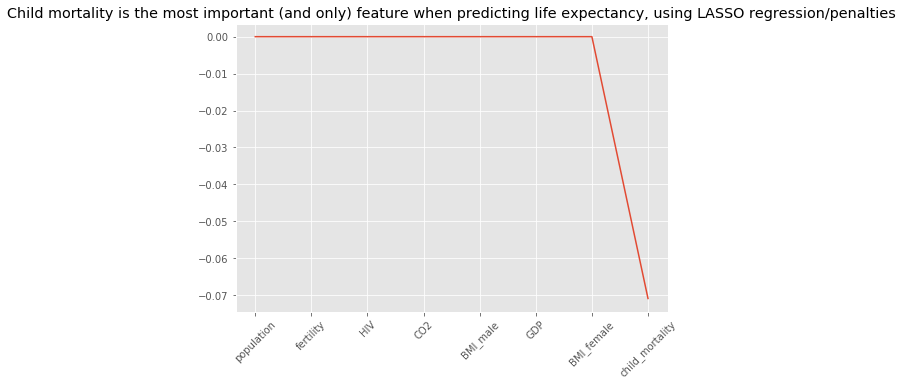

In [29]:
# Regularization I: Lasso

# gapminder data
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)
y = df['life'].values
X = df.drop('life', axis=1).values


# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor with an alpha equal to 0.4: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

df_columns = df.drop('life', axis=1).columns

# Plot the coefficients
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.xticks(range(len(lasso_coef)), df_columns, rotation=45)
plt.title("Child mortality is the most important (and only) feature when predicting life expectancy, using LASSO regression/penalties")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


[-1.47994328e-09 -9.67320787e-01 -4.76960455e-01  4.20634758e-03
  5.26137501e-01  7.16032015e-05 -3.06897014e-01 -5.15921590e-02]


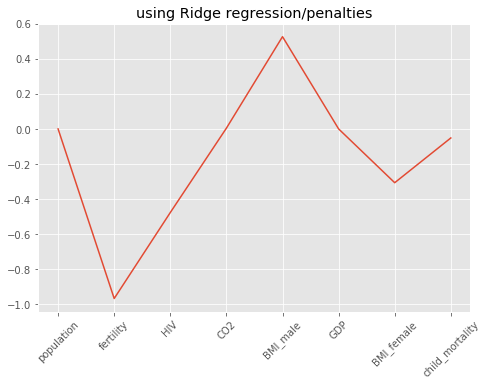

In [30]:
# Import Ridge  --meu
from sklearn.linear_model import Ridge

# Instantiate a lasso regressor with an alpha equal to 0.4: lasso
ridge = Ridge(alpha=0.4, normalize=True)

# Fit the regressor to the data
ridge.fit(X, y)

# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

df_columns = df.drop('life', axis=1).columns

# Plot the coefficients
plt.plot(range(len(ridge_coef)), ridge_coef)
plt.xticks(range(len(ridge_coef)), df_columns, rotation=45)
plt.title("using Ridge regression/penalties")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 13

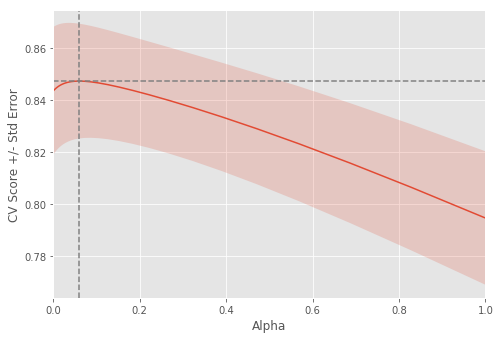

In [31]:
# Regularization II: Ridge

# Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

# gapminder data
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)
y = df['life'].values
X = df.drop('life', axis=1).values


#  In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot 
# cross-validated R2 scores for each, using this function that we have defined for you:
# (which plots the R2 score as well as standard error for each alpha)

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
#     ax.set_xscale('log')
    ax.axvline(alpha_space[cv_scores.index(np.max(cv_scores))], linestyle='--', color='.5')  # acrescentei
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.show()
    
# The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand
# the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter. 

##################################################################################

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []


# Create a ridge regressor: ridge (sem especificar o alpha ainda)
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


# Notice how the cross-validation scores change with different alphas. 
# Which alpha should you pick? How can you fine-tune your model?


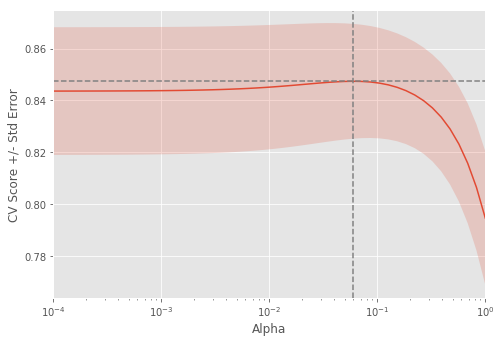

In [32]:
# x log

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    ax.axvline(alpha_space[cv_scores.index(np.max(cv_scores))], linestyle='--', color='.5')     # acrescentei
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.show()

display_plot(ridge_scores, ridge_scores_std)

# Chapter 3 - Fine-tuning your model

#### Exercício 1 - How good is your model?

[[25  0  1]
 [ 2 17  8]
 [ 3 10  6]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.63      0.63      0.63        27
           2       0.40      0.32      0.35        19

   micro avg       0.67      0.67      0.67        72
   macro avg       0.62      0.64      0.63        72
weighted avg       0.64      0.67      0.65        72



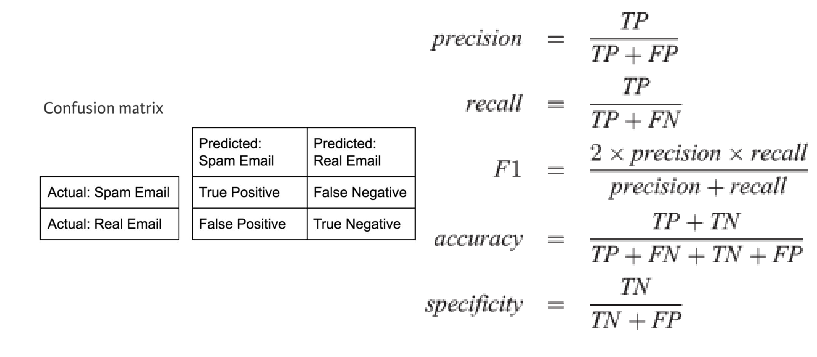

In [33]:
#vídeo

# Classification metrics

#  Measuring model performance with accuracy:
#     Fraction of correctly classified samples
#     Not always a useful metric! (class imbalances)

# --> Class imbalance (common situation). Example (emails):
#         Consider a spam classification - 99% e-mails are real, 1% is spam
#         could build a model that predicts that ALL emails are real:
#           - it would be correct 99% of the time !
#           - but it would be a horrible classifier of spam: it would never predict spam


# Diagnosing classification predictions

# Confusion matrix: Actual  vs Predicted  (true/false positive, true/false negative)
#     usually we're interessed in the positive class (we are trying to predict spam, so it's positive)
#           True positive (correct)
#           False positive (incorrect) - we predicted spam but it was real email

# Accuracy: 
#     (tp + tn) / (tp+tn + fp+fn)

# Precision: 
#     tp / (tp+fp)

# Recall, sensitivity or true positive rate (TPR):
#     tp / (tp+fn)

# F1 score (the harmonic mean of precision and recall):
#     2 *  (precision*recall) / (precison + recall)

# High precision: not many real emails predicted as spam
# High recall: predicted most spam emails correctly

# The support gives the number of samples of the true response that lie in that class

# Confusion matrix in scikit-learn

wine = datasets.load_wine()
X = wine.data
y = wine.target

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

###############################################################################################

f = plt.figure()
f.add_subplot(1,2, 1)
imagem = plt.imread(data_folder + "confusion_matrix.jpg")
plt.imshow(imagem)
plt.axis('off')
f.add_subplot(1,2, 2)
imagem_2 = plt.imread(data_folder + "confusion_matrix_2.jpg")
plt.imshow(imagem_2)
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-1, right=1.8, top=1, wspace=0, hspace=0)
plt.show(block=True)

Exercício 2

In [34]:
# Metrics for classification

diabetes = pd.read_csv(data_folder + "diabetes.csv")
# diabetes[['triceps', 'insulin']] = diabetes[['triceps', 'insulin']].astype(np.float64)
X = diabetes.drop('diabetes', axis=1).values
y = diabetes['diabetes'].values
#################################################################################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))  # sempre por esta ordem
print("\nClassification report:\n", classification_report(y_test, y_pred))

diabetes.head()

# With the confusion matrix and classification report you can get a better understanding of the classifier's performance.

Confusion matrix:
 [[176  30]
 [ 56  46]]

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Exercício 3 - Logistic regression and the ROC curve

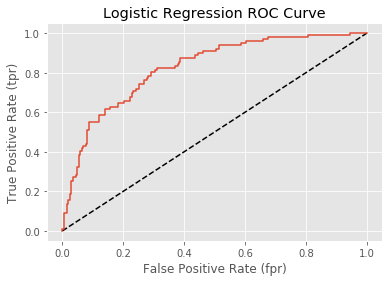

In [35]:
#vídeo

# Logistic regression for binary classification

# Logistic regression outputs probabilities
#  If the probability 'p' is greater than 0.5, the data is labeled '1'
#  If the probability 'p' is less than 0.5, the data is labeled '0'
# it produces a linear decision boundary


# Logistic regression in scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

####################################################################################################

# Probability thresholds

# By default, the logistic regression threshold = 0.5
# this is not specific to logistic regression (k-NN also have thresholds)
# What happens if we vary this threshold?
# in particular, what happens to the true positive and false positive rates?

# The ROC curve ---> Receiver Operating Characteristics curve
# threshold = 0 ==> true positive rate == false positive rate == 1
# threshold = 1 ==> true positive rate == false positive rate == 0
#       It tells how much the model is capable of distinguishing between classes.

from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:, 1] #probability of the predicted labels being 1

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.title("Logistic Regression ROC Curve")
plt.show()

Exercício 4

In [36]:
# Building a logistic regression model     (-> with the diabetes data will it perform better than k-NN?)

# scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm 
# applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'.
# Will the logistic regression model outperform k-NN? 

#################################################################################################
diabetes = pd.read_csv(data_folder + "diabetes.csv")
# diabetes[['triceps', 'insulin']] = diabetes[['triceps', 'insulin']].astype(np.float64)
X = diabetes.drop('diabetes', axis=1).values
y = diabetes['diabetes'].values
#################################################################################################

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# better than the k-NN

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

   micro avg       0.76      0.76      0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



Exercício 5

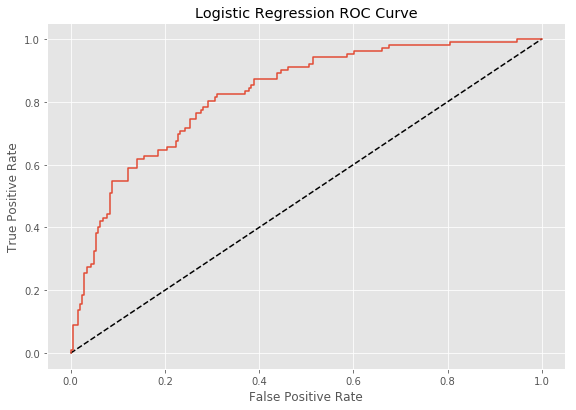

In [37]:
# Plotting an ROC curve

# Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while
# ROC curves provide a way to visually evaluate models.
# Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being
# in a particular class. 
# Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve.

# diabetes dataset

from sklearn.metrics import roc_curve

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute the predicted probabilities of the labels of the test set (X_test): y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# tpr = recall = ( tp / (tp + fn)) -->  how well we predict when it's positive 
# fpr          = ( fp / (fp + tn)) --> "how well we miss" when it's negative

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logistic Regression ROC Curve")
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()


# we use the predicted probabilities of the model - logreg.predict_proba() - assigning a value of 1 to the observation
# in question. This is because to compute the ROC we do not merely want the predictions on the test set, but the 
# probability that our logreg model outputs before using a threshold to predict the label

# we then use logreg.predict_proba(X_test)
# this is an array with 2 columns: each column contains the probabilities for the respected target values
# we choose the second column - [:, 1] - , the probabilities of the predicted labels being 1

Exercício 6

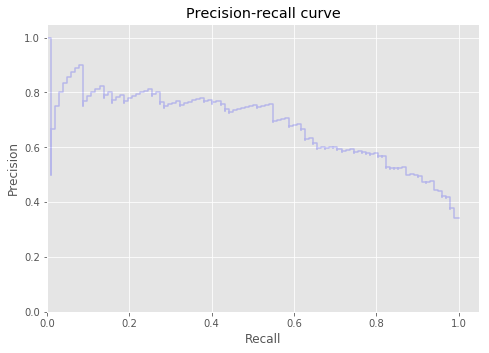

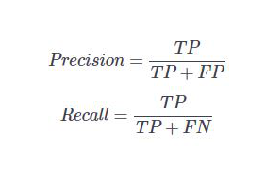

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

   micro avg       0.76      0.76      0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



In [38]:
# Precision-recall Curve (pergunta escolha múltipla)

##############################################################################################
from sklearn.metrics import precision_recall_curve
y_score = logreg.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-recall curve")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()
#####################################################################################################

imagem = plt.imread(data_folder + "precision-recall.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0.5, right=0.5, top=1, wspace=0, hspace=0)
plt.show()
#################################################################################################
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
##########################################################################################

In [39]:
# Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes.

# 1) A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were 
#    correctly classified as such, at the expense of many misclassifications of those who did not have diabetes. 
#    (TRUE)

# 2) Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not 
#    having diabetes.
#    (TRUE)

# 3) When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its 
#    predictions.
#    (TRUE)

# 4) Precision and recall take true negatives into consideration.
#    (FALSE)

#### Exercício 7 - Area under the ROC curve (AUC)

In [40]:
#vídeo

# Larger area under the ROC curve = better model

# AUC in scikit-learn
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

print(roc_auc_score(y_test, y_pred_prob))


# AUC using cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print(cv_scores)


0.8241956976965542
[0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]


Exercício 8

In [41]:
# AUC computation

# Say you have a binary classifier that in fact is just randomly making guesses. 
# It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the 
# True Positive Rate and False Positive Rate are always equal. 
# The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model.
# If the AUC is greater than 0.5, the model is better than random guessing.

diabetes = pd.read_csv(data_folder + "diabetes.csv")
X = diabetes.drop('diabetes', axis=1).values
y = diabetes['diabetes'].values
###############################################################################################

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)

####################################################################

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8241956976965542
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]


#### Exercício 9  -Hyperparameter tuning

{'n_neighbors': 14}
0.7578125


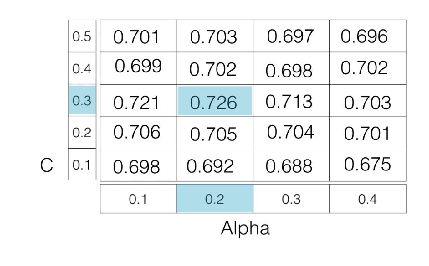

In [42]:
#vídeo

# Linear regression: Choosing parameters
# Ridge/Lasso regression: Choosing alpha
# k-Nearest Neighbors: Choosing n_neighbors
# Parameters like alpha and k: Hyperparameters
# that is, Hyperparameters cannot be learned by fitting the model

# Choosing the correct Hyperparameter is key

# traditional method: 
#   try different hyperparameter values
#   fit them all separately
#   see how well each performs
#   choose the best

# ---->> It's essential to use cross-validation, train-test split alone would risk overfitting the hyperparameters to 
#        the test set.
# a seguir vamos ver que: 
#   even after tuning the hyperparameter using cross-validation, we'll want to already split off a test set in order to 
#   report how well our model can be expected to perform on a data set that has never seen before

# Grid search cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}  # keys are the hyperparameter names [n_neighbors (k-NN), alpha(Ridge/Lasso)]
# (see the documentation on each model for the name of parameters)

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)  # this fit performs the actual Gridsearch in place    ### não se separa entre training e teste antes?

# best parameters
print(knn_cv.best_params_)

# best score
print(knn_cv.best_score_)

#################################################################################
imagem = plt.imread(data_folder + "Grid_Search_cross-validation.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=1, wspace=0, hspace=0)
plt.show()
#################################################################################

# vamos ver tb 'RandomizedSearchCV' - it's similar but jumps around the grid

Exercício 10

In [43]:
# Hyperparameter tuning with GridSearchCV

diabetes = pd.read_csv(data_folder + "diabetes.csv")
X = diabetes.drop('diabetes', axis=1).values
y = diabetes['diabetes'].values
###############################################################################################

# we will use the logistic regression this time

# Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a
# regularization parameter: 'C' --> 'C' controls the inverse of the regularization (penalty) strength.
# A large 'C' can lead to an overfit model, while a small 'C' can lead to an underfit model.

# you add to what is minimized and also minimize a function that penalizes large values of the parameters.
# Most often the function is λ*Σβj^2, which is some constant λ times the sum of the squared parameter values βj^2
# The larger λ is, the less likely it is that the parameters will be increased in magnitude simply to adjust for small 
# perturbations in the data. Rather than specifying λ, you specify C=1/λ.

# Find the optimal C in this hyperparameter space.

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)   # c este solver aqui já n é preciso definir o iid

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))



# não se separam os dados entre training e test antes disso tudo? ---> ver a seguir

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734375


Exercício 11

In [44]:
# Hyperparameter tuning with RandomizedSearchCV

# GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and 
# dealing with multiple hyperparameters. 
# A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out.
# Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions

# Here, you'll also be introduced to a new model: the Decision Tree.
# Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() 
# methods that you can use in exactly the same way as before. 
# Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: 
# This makes it an ideal use case for RandomizedSearchCV.

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2}
Best score is 0.7356770833333334


RandomizedSearchCV will never outperform GridSearchCV. It is valuable because it saves on computation time.

#### Exercício 12 - Hold-out set for final evaluation

In [45]:
#vídeo

# Hold-out set reasoning
# How well can the model perform on never before seen data?
# Using ALL data for cross-validation is not real
# --> Split data into training and hold-out set at the beginning
# Perform grid search cross-validation on training set
# Then, and only then, choose best hyperparameters and evaluate on hold-out set

Exercício 13

In [46]:
# For which of the following reasons would you want to use a hold-out set for the very end?
# Answer: You want to be absolutely certain about your model's ability to generalize to unseen data.

Exercício 14

In [47]:
# Hold-out set in practice I: Classification

diabetes = pd.read_csv(data_folder + "diabetes.csv")
X = diabetes.drop('diabetes', axis=1).values
y = diabetes['diabetes'].values
###############################################################################################

# In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' 
# regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of
# a logistic regression classifier using GridSearchCV on the training set.
# penalty : str, ‘l1’ or ‘l2’, default: ‘l2’
# Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')  # tenho que usar este solver ou 'saga' para aceitar l1

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # com test_size=0.4, 'C' = 31 ! (default=0.25)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, iid=False)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)   # this fit performs the actual Gridsearch in place

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7742962729161735


Exercício 15

In [48]:
# Hold-out set in practice II: Regression   (with 'elastic net')

# Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. 
# There is another type of regularized regression known as the 'elastic net'. In elastic net regularization, the penalty 
# term is a linear combination of the L1 and L2 penalties:

# a∗L1 + b∗L2

# In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty,
# and anything lower is a combination of L1 and L2.
# l1_ratio = a / (a + b)

#####################################################################################################
# gapminder data
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)
y = df['life'].values
X = df.drop('life', axis=1).values
#####################################################################################################


# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet(tol=0.5)

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5, iid=False)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

# elastic_net.get_params   ## p ver os parâmetros associados à função ElasticNEt() - aumentei o tol para n aparecer aviso

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.6896551724137931}
Tuned ElasticNet R squared: 0.8375617439382999
Tuned ElasticNet MSE: 12.268503586786778


# Chapter 4 - Preprocessing and pipelines

#### Exercício 1 - Preprocessing data

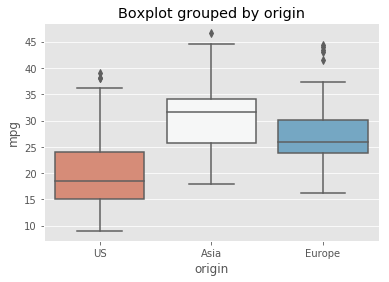

R^2: 0.7190645190217895 , with Ridge regression


,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


In [49]:
#vídeo

# Dealing with categorical features

# Scikit-learn will not accept categorical features by default
# --> need to encode categorical features numerically
# Convert to 'dummy variables':
#    0: observation was not that category
#    1: observation was that category
# attention with the duplication of variables/information- scikit-learn may not be able to deal with this (0, 0, 1)

# Dealing with categorical features in Python:
# ---> scikit-learn: OneHotEncoder()
# ---> pandas: get_dummies()

# Automobile dataset
# mpg: target variable
# origin: categorical feature ("US", "Asia", "Europe")

df = pd.read_csv(data_folder + "auto.csv")

# EDA with categorical features
sns.boxplot('origin', 'mpg', data=df, palette="RdBu")
plt.title("Boxplot grouped by origin")
plt.show()


# Encoding dummy variables (with pandas)
df_origin = pd.get_dummies(df)

#pandas automatically divides in 3 columns/variables(origin_Europe, origin_Asia and origin_US)
# mas como já sabemos que basta ter informação de 2 colunas para saber tudo,

df_origin = df_origin.drop('origin_Asia', axis=1)

y = df_origin['mpg'].values
X = df_origin.drop('mpg', axis=1).values

# Then,
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.5, normalize=True)

ridge.fit(X_train, y_train)

print("R^2: {} , with Ridge regression".format(ridge.score(X_test, y_test)))
# print(ridge.coef_)
df_origin.head()

Exercício 2

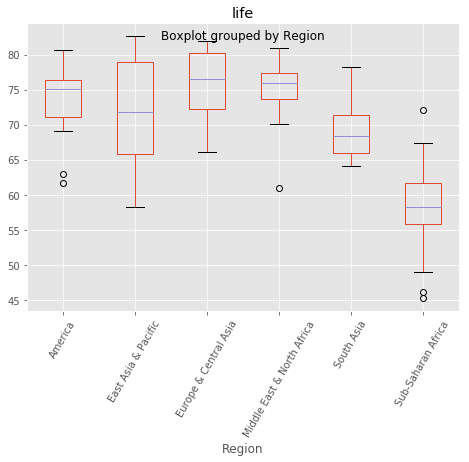

In [50]:
# Exploring categorical features

# gapminder data
df = pd.read_csv(data_folder + 'gm_2008_region.csv') #.drop('Region', axis=1)
y = df['life'].values
X = df.drop('life', axis=1).values
#####################################################################################################

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)
# sns.boxplot('Region', 'life', data=df)

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 3

In [51]:
# Creating dummy variables

# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)
df_region.head()

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


Exercício 4

In [52]:
# Regression with categorical features

y = df_region['life'].values
X = df_region.drop('life', axis=1).values

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(normalize=True, alpha=0.5)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print("5-fold cross-validation scores (R squared): {}".format(ridge_cv))


5-fold cross-validation scores (R squared): [0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


#### Exercício 5 - Handling missing data

In [53]:
#vídeo

df = pd.read_csv(data_folder + "diabetes.csv")
X = diabetes.drop('diabetes', axis=1).values
y = diabetes['diabetes'].values

df.info()  
# it doesn't appear that it has missing values, however, they can be there through a myriad of ways: 0's, typo's, errors.. 

df.head() # insulin and triceps has 0's
print("================================================")

df['insulin'].replace(0, np.nan, inplace=True)
df['triceps'].replace(0, np.nan, inplace=True)
df['bmi'].replace(0, np.nan, inplace=True)

df.info()

# How to deal with missing data?

#1)  Dropping 
#    df = df.dropna()   ---> but this way we miss half of the data, because of the insulin variable mainly

#2) Imputing missing data
# Making an educated guess about the missing values (for example, the mean of the non-missing entries)
# let's try this

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0) 
# missing values are represented as 'NaN'
# the startegy is to replace with the np.mean of the non-missing values
# along axis=0, that is, along columns (the mean is on the columns)

imp.fit(X)
X = imp.transform(X)  # imputers are known as 'transformers'. 
#                       Any model that can transform the data in this way is called a 'transformer'

# we could then do the supervised techniques, but can we do it in one step? yes ---> pipeline

# Imputing within a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer


from sklearn.model_selection import train_test_split

# imp = Imputer(missing_values='NaN', strategy='mean', axis=0) 
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) 

logreg = LogisticRegression(solver='lbfgs', max_iter=5000)

steps = [('imputation', imp), ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)


# Note: in a pipeline each step of the last must be a transformer, and the last must be an estimator, such as a classifier, 
#       regressor, or transformer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0.7359307359307359

Exercício 6

In [54]:
# Dropping missing data

# voting data -> vamos fazer os passos da substituição dos '?' apenas
df = pd.read_csv(data_folder + "house-votes-84.csv", header=-1)
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid',  'missile',
       'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.replace({'n': 0, 'y': 1}, inplace=True)
#################################################################################################################

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


Exercício 7

In [55]:
# Imputing missing data in a ML Pipeline I

# There are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, 
# to tuning its parameters, to evaluating its performance on new data.

# Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the
# context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into 
# one process and thereby simplify your workflow.

# You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a 
# classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. 
# You will now be introduced to a fourth one - the Support Vector Machine, or SVM. 
# (It works as the other scikit-learn estimators, in that it has the same .fit() and .predict() methods as before.)

# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC  # SVC stands for Support Vector Classification, which is a type of SVM.

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp), ('SVM', clf)]


#  Having set up the pipeline steps, you can now use it for classification.
clf
steps
imp

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

Exercício 8

In [56]:
# Imputing missing data in a ML Pipeline II

df = pd.read_csv(data_folder + "house-votes-84.csv", header=-1)
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid',  'missile',
       'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.replace({'n': 0, 'y': 1, '?': np.nan}, inplace=True)
y = df['party'].values
X = df.drop('party', axis=1).values
#################################################################################################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)), ('SVM', SVC(gamma='scale'))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    democrat       0.99      0.96      0.98        85
  republican       0.94      0.98      0.96        46

   micro avg       0.97      0.97      0.97       131
   macro avg       0.96      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### Exercício 9 - Centering and scaling

In [57]:
#vídeo

# Why scale your data?
df = pd.read_csv(data_folder + "winequality-red.csv")
df.describe()

# Many models use some form of distance to inform them
# Features on larger scales can unduly influence the model
# Example: k-NN uses distance explicitly when making predictions --> we then want the features to be on a similar scale
# ---> Normalizing (or scaling and centering)


# Ways to normalize the data

# 1) Standardization: subtract the mean and divide by variance (all features centered around 0 and have variance 1)
# 2) Subtract by the minimum and divide by the range (minimum 0 and maximum 1)
# 3) Normalize so that the data ranges from -1 to +1

# we're going to do 1) --> see sklearn docs for the other 2 methods

y = df['quality'].values
X = df.drop('quality', axis=1).values

############################################################################################################

# Scaling in scikit-learn
from sklearn.preprocessing import scale

X_scaled = scale(X)

print("mean and std of X:", np.mean(X), np.std(X))

print("mean and std of X_scaled:", round(np.mean(X_scaled)), np.std(X_scaled), "\n")

# Scaling in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# score with the X_scaled
print("score with the X_scaled:", pipeline.score(X_test, y_test))

# unscaled
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print("score with the X unscaled:", knn_unscaled.score(X_test, y_test), "\n")

###########################################################################################################

# CV and scaling in a pipeline
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors': np.arange(1, 50)}    # 'knn' + '__' + 'hyperparameter'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print("best parameter: k = ", cv.best_params_)

print("score:", cv.score(X_test, y_test))

print("Classification report:\n", classification_report(y_test, y_pred))


mean and std of X: 8.134219224515322 16.726533979432848
mean and std of X_scaled: 0.0 1.0 

score with the X_scaled: 0.546875
score with the X unscaled: 0.45625 

best parameter: k =  {'knn__n_neighbors': 1}
score: 0.5854166666666667
Classification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.10      0.14        20
           5       0.62      0.68      0.65       186
           6       0.62      0.55      0.58       204
           7       0.50      0.62      0.55        63
           8       0.33      0.20      0.25         5

   micro avg       0.59      0.59      0.59       480
   macro avg       0.38      0.36      0.36       480
weighted avg       0.58      0.59      0.58       480



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Exercício 10

In [58]:
# Centering and scaling your data

df = pd.read_csv(data_folder + "white-wine.csv")
y = np.where(df['quality'] < 5, 1, 0)
X = df.drop('quality', axis=1).values
##########################################################################################

# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("\nMean of Scaled Features: {}".format(round(np.mean(X_scaled))))
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571

Mean of Scaled Features: 0.0
Standard Deviation of Scaled Features: 0.9999999999999999


Exercício 11

In [59]:
# Centering and scaling in a pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))         # (correct predictions / n)
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))    # (correct predictions / n)

# n saiu como esperado

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


Exercício 12 

In [60]:
# Bringing it all together I: Pipeline for classification

# You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. 
# The hyperparameters you will tune are 'C' and 'gamma'. 
# 'C' controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, 
# while 'gamma' controls the kernel coefficient.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Setup the pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100], 'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)   # default is cv=3

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}\n".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("\nTuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.9693877551020408

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.43      0.10      0.17        29

   micro avg       0.97      0.97      0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980


Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


Exercício 13

In [61]:
# Bringing it all together II: Pipeline for regression

# gapminder data
df = pd.read_csv(data_folder + 'gm_2008_region.csv').drop('Region', axis=1)
y = df['life'].values
X = df.drop('life', axis=1).values
#####################################################################################################

from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Imputer

# Setup the pipeline steps: steps     #--> tirei ('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
steps = [('scaler', StandardScaler()), ('elasticnet', ElasticNet(tol=0.3))]  


# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3, iid=False)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.7586206896551724}
Tuned ElasticNet R squared: 0.8752023546220055


In [62]:
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),   # <---
         ('scaler', StandardScaler()), ('elasticnet', ElasticNet(tol=0.3))]

pipeline = Pipeline(steps)

parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

gm_cv = GridSearchCV(pipeline, parameters, cv=3, iid=False)

gm_cv.fit(X_train, y_train)

r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.7586206896551724}
Tuned ElasticNet R squared: 0.8752023546220055


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

#### Exercício 14 - final thoughts

In [63]:
#vídeo

# Fim